In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#PCA dimension reduced files
X_train = pd.read_pickle("../X_train_pca.npk")
X_test = pd.read_pickle("../X_test_pca.npk")

#keeps the totalRansactionRevenue, class_pred = 0 if didnt buy anythin and 1 if did
y_test = pd.read_pickle("../y_test.pkl")
y_train = pd.read_pickle("../y_train.pkl")

In [4]:
#Remove entries with 0 revenue for PCA Data training set 
X_train=X_train[y_train ['totals.transactionRevenue']!=0]
y_train = y_train[y_train['totals.transactionRevenue'] != 0]


In [5]:
#Remove entries with 0 revenue for PCA testing set 
X_test=X_test[y_test['totals.transactionRevenue']!=0]
y_test=y_test[y_test['totals.transactionRevenue']!=0]

In [13]:
#Random Forest Regression
clf = RandomForestRegressor(n_estimators = 100) 

In [16]:
#Use cross validation to determine best parameters
import random
random.seed(77)
param_grid = {
#                  'n_estimators': [5, 10, 15, 20],
                'max_features': ['auto', 'log2'],
                'min_samples_leaf':  [.1, .001]
#                  'max_depth': [2, 5, 7, 9]
             }

grid_clf = GridSearchCV(clf, param_grid, cv=3)
grid_clf.fit(X_train, np.log(y_train['totals.transactionRevenue']))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'log2'], 'min_samples_leaf': [0.1, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
#Best Parameters from cross validation
grid_clf.best_params_

{'max_features': 'log2', 'min_samples_leaf': 0.001}

In [18]:
#Make Predictions
y_pred=grid_clf.predict(X_test)

In [19]:
#Calculate test MSE 
mse=mean_squared_error(np.log(y_test['totals.transactionRevenue']), y_pred)
rmse=math.sqrt(mse)
rmse

1.1201821264178737

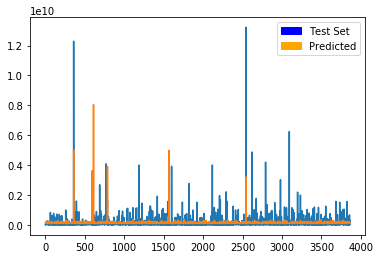

In [9]:
import pylab
import matplotlib.patches as mpatches

#Plot RFRegression 
plt.plot(range(0,len(X_test)),y_test['totals.transactionRevenue'])
plt.plot(range(0,len(y_test)),y_pred) 
blue_patch = mpatches.Patch(color='blue', label='Test Set')
orange_patch=mpatches.Patch(color='orange',label='Predicted')
plt.legend(handles=[blue_patch,orange_patch])
